In [1]:
import numpy as np
import math
import torch
from torch import nn

import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
from livelossplot import PlotLosses
#from Inference.GeNVI_method import GeNVariationalInference, GeNetEns
from Inference.GeNVI_predictive import GeNPredVI, GeNetEns

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [9]:
from Experiments.foong import Setup
layerwidth=50
nblayers=1
setup=Setup(device,layerwidth=layerwidth,nblayers=nblayers)


# Target density #

In [10]:
logprior=setup.logPredPrior
loglikelihood=setup.loglikelihood
projection=setup.projection
size_sample=setup.n_train_samples
param_count=setup.param_count
model=setup._model

size_sample

200

# GeNVI #

In [12]:
activation = nn.Tanh()#nn.ReLU()
init_b = .001

GeN = GeNetEns(1, 5, 50, param_count, activation, 1., init_b, device)

In [13]:
%matplotlib inline
from tempfile import TemporaryDirectory

k_MC=300

def show(x,y):
    return

with TemporaryDirectory() as temp_dir:
    optimizer = GeNPredVI(loglikelihood, logprior, projection, k_MC,
		                                    0, 100, 1000, 50, 50,
		                                    20000, .01, .00001, 200, .5,
		                                    device, True, temp_dir, save_best=True)
    best_epoch, scores=optimizer.run(GeN,show)
#    optimizer = GeNVariationalInference(logtarget,
#		                                    1, 100, 1000, 50, 100,
#		                                    20000, .01, .000001, 500, .5,
#		                                    device, True, temp_dir, save_best=True)
#    best_epoch, scores=optimizer.run(GeN)
print(best_epoch)

Epoch [0/20000], Loss: 5482925.0, Entropy 149.071044921875, Learning Rate: 0.01
Epoch [1/20000], Loss: 3369124.25, Entropy 128.1951904296875, Learning Rate: 0.01
Epoch [2/20000], Loss: 2559994.0, Entropy 105.8592529296875, Learning Rate: 0.01
Epoch [3/20000], Loss: 2806673.25, Entropy 71.194580078125, Learning Rate: 0.01
Epoch [4/20000], Loss: 1848891.625, Entropy 72.436767578125, Learning Rate: 0.01
Epoch [5/20000], Loss: 1280528.75, Entropy 93.8782958984375, Learning Rate: 0.01
Epoch [6/20000], Loss: 996274.9375, Entropy 32.795166015625, Learning Rate: 0.01
Epoch [7/20000], Loss: 1271814.25, Entropy 74.1578369140625, Learning Rate: 0.01
Epoch [8/20000], Loss: 1161050.625, Entropy 53.89892578125, Learning Rate: 0.01
Epoch [9/20000], Loss: 1144360.5, Entropy 61.2711181640625, Learning Rate: 0.01
Epoch [10/20000], Loss: 1155569.5, Entropy 32.692138671875, Learning Rate: 0.01
Epoch [11/20000], Loss: 1149575.375, Entropy 23.6756591796875, Learning Rate: 0.01
Epoch [12/20000], Loss: 852799

Epoch [129/20000], Loss: 85970.6328125, Entropy -237.0654296875, Learning Rate: 0.01
Epoch [130/20000], Loss: 102519.0, Entropy -233.68310546875, Learning Rate: 0.01
Epoch [131/20000], Loss: 72909.1640625, Entropy -244.3966064453125, Learning Rate: 0.01
Epoch [132/20000], Loss: 84496.5546875, Entropy -226.772705078125, Learning Rate: 0.01
Epoch [133/20000], Loss: 87299.0546875, Entropy -223.602294921875, Learning Rate: 0.01
Epoch [134/20000], Loss: 75374.8671875, Entropy -233.260009765625, Learning Rate: 0.01
Epoch [135/20000], Loss: 58471.875, Entropy -258.890380859375, Learning Rate: 0.01
Epoch [136/20000], Loss: 61324.34765625, Entropy -202.5386962890625, Learning Rate: 0.01
Epoch [137/20000], Loss: 75291.1875, Entropy -259.028076171875, Learning Rate: 0.01
Epoch [138/20000], Loss: 68801.3359375, Entropy -239.491455078125, Learning Rate: 0.01
Epoch [139/20000], Loss: 79416.90625, Entropy -251.942138671875, Learning Rate: 0.01
Epoch [140/20000], Loss: 74507.9296875, Entropy -225.4475

Epoch [229/20000], Loss: 33232.09765625, Entropy -348.643310546875, Learning Rate: 0.01
Epoch [230/20000], Loss: 26986.6640625, Entropy -356.5103759765625, Learning Rate: 0.01
Epoch [231/20000], Loss: 48333.0234375, Entropy -372.62298583984375, Learning Rate: 0.01
Epoch [232/20000], Loss: 34492.28515625, Entropy -352.0736083984375, Learning Rate: 0.01
Epoch [233/20000], Loss: 33685.98828125, Entropy -359.28521728515625, Learning Rate: 0.01
Epoch [234/20000], Loss: 26682.51953125, Entropy -353.66314697265625, Learning Rate: 0.01
Epoch [235/20000], Loss: 30087.06640625, Entropy -373.949951171875, Learning Rate: 0.01
Epoch [236/20000], Loss: 22531.5234375, Entropy -386.7862548828125, Learning Rate: 0.01
Epoch [237/20000], Loss: 25011.369140625, Entropy -373.7357177734375, Learning Rate: 0.01
Epoch [238/20000], Loss: 36712.296875, Entropy -384.4986572265625, Learning Rate: 0.01
Epoch [239/20000], Loss: 26417.9609375, Entropy -364.32867431640625, Learning Rate: 0.01
Epoch [240/20000], Loss:

Epoch [349/20000], Loss: 19502.7421875, Entropy -439.460693359375, Learning Rate: 0.01
Epoch [350/20000], Loss: 18995.361328125, Entropy -460.54510498046875, Learning Rate: 0.01
Epoch [351/20000], Loss: 15714.8759765625, Entropy -468.06103515625, Learning Rate: 0.01
Epoch [352/20000], Loss: 15686.59375, Entropy -428.5780029296875, Learning Rate: 0.01
Epoch [353/20000], Loss: 15332.6015625, Entropy -442.15106201171875, Learning Rate: 0.01
Epoch [354/20000], Loss: 15381.6923828125, Entropy -471.18170166015625, Learning Rate: 0.01
Epoch [355/20000], Loss: 17057.197265625, Entropy -474.1494140625, Learning Rate: 0.01
Epoch [356/20000], Loss: 17842.322265625, Entropy -458.20208740234375, Learning Rate: 0.01
Epoch [357/20000], Loss: 16567.96875, Entropy -458.93267822265625, Learning Rate: 0.01
Epoch [358/20000], Loss: 14992.779296875, Entropy -493.51983642578125, Learning Rate: 0.01
Epoch [359/20000], Loss: 14713.37109375, Entropy -446.65545654296875, Learning Rate: 0.01
Epoch [360/20000], L

Epoch [443/20000], Loss: 8809.484375, Entropy -553.7282104492188, Learning Rate: 0.01
Epoch [444/20000], Loss: 11394.1708984375, Entropy -517.2244262695312, Learning Rate: 0.01
Epoch [445/20000], Loss: 13856.74609375, Entropy -547.3638916015625, Learning Rate: 0.01
Epoch [446/20000], Loss: 13444.734375, Entropy -517.9314575195312, Learning Rate: 0.01
Epoch [447/20000], Loss: 14009.9775390625, Entropy -519.38232421875, Learning Rate: 0.01
Epoch [448/20000], Loss: 13419.5419921875, Entropy -515.7256469726562, Learning Rate: 0.01
Epoch [449/20000], Loss: 9372.068359375, Entropy -529.8037719726562, Learning Rate: 0.01
Epoch [450/20000], Loss: 10436.1953125, Entropy -488.302001953125, Learning Rate: 0.01
Epoch [451/20000], Loss: 12286.0732421875, Entropy -502.82598876953125, Learning Rate: 0.01
Epoch [452/20000], Loss: 12853.3505859375, Entropy -524.7680053710938, Learning Rate: 0.01
Epoch [453/20000], Loss: 12644.912109375, Entropy -530.4315185546875, Learning Rate: 0.01
Epoch [454/20000],

Epoch [540/20000], Loss: 7306.25390625, Entropy -554.6060180664062, Learning Rate: 0.01
Epoch [541/20000], Loss: 8746.68359375, Entropy -571.8138427734375, Learning Rate: 0.01
Epoch [542/20000], Loss: 8219.654296875, Entropy -551.10595703125, Learning Rate: 0.01
Epoch [543/20000], Loss: 7219.5478515625, Entropy -560.3193359375, Learning Rate: 0.01
Epoch [544/20000], Loss: 6475.69970703125, Entropy -575.1756591796875, Learning Rate: 0.01
Epoch [545/20000], Loss: 8245.0947265625, Entropy -552.368408203125, Learning Rate: 0.01
Epoch [546/20000], Loss: 8738.9970703125, Entropy -593.2140502929688, Learning Rate: 0.01
Epoch [547/20000], Loss: 6591.921875, Entropy -576.3031005859375, Learning Rate: 0.01
Epoch [548/20000], Loss: 8079.578125, Entropy -576.5084228515625, Learning Rate: 0.01
Epoch [549/20000], Loss: 5979.958984375, Entropy -607.6353759765625, Learning Rate: 0.01
Epoch [550/20000], Loss: 6944.06298828125, Entropy -580.341064453125, Learning Rate: 0.01
Epoch [551/20000], Loss: 6894

Epoch [640/20000], Loss: 7573.48681640625, Entropy -612.307373046875, Learning Rate: 0.01
Epoch [641/20000], Loss: 5237.34130859375, Entropy -644.9295654296875, Learning Rate: 0.01
Epoch [642/20000], Loss: 6748.68115234375, Entropy -625.3138427734375, Learning Rate: 0.01
Epoch [643/20000], Loss: 8112.6328125, Entropy -614.6177978515625, Learning Rate: 0.01
Epoch [644/20000], Loss: 5196.9755859375, Entropy -606.3839111328125, Learning Rate: 0.01
Epoch [645/20000], Loss: 6979.09423828125, Entropy -614.797119140625, Learning Rate: 0.01
Epoch [646/20000], Loss: 6086.6943359375, Entropy -603.4146728515625, Learning Rate: 0.01
Epoch [647/20000], Loss: 5740.048828125, Entropy -618.7247314453125, Learning Rate: 0.01
Epoch [648/20000], Loss: 5331.0888671875, Entropy -634.3104248046875, Learning Rate: 0.01
Epoch [649/20000], Loss: 6033.0732421875, Entropy -627.23974609375, Learning Rate: 0.01
Epoch [650/20000], Loss: 6381.96484375, Entropy -612.0806274414062, Learning Rate: 0.01
Epoch [651/20000

Epoch [733/20000], Loss: 4855.66064453125, Entropy -671.571533203125, Learning Rate: 0.01
Epoch [734/20000], Loss: 4290.458984375, Entropy -655.7545166015625, Learning Rate: 0.01
Epoch [735/20000], Loss: 4371.330078125, Entropy -663.31201171875, Learning Rate: 0.01
Epoch [736/20000], Loss: 3538.399169921875, Entropy -654.6937255859375, Learning Rate: 0.01
Epoch [737/20000], Loss: 4051.296875, Entropy -656.4776611328125, Learning Rate: 0.01
Epoch [738/20000], Loss: 3991.230224609375, Entropy -677.6192626953125, Learning Rate: 0.01
Epoch [739/20000], Loss: 5224.4423828125, Entropy -685.9546508789062, Learning Rate: 0.01
Epoch [740/20000], Loss: 5315.486328125, Entropy -621.1163940429688, Learning Rate: 0.01
Epoch [741/20000], Loss: 3910.112548828125, Entropy -643.9771728515625, Learning Rate: 0.01
Epoch [742/20000], Loss: 4266.78173828125, Entropy -670.3009033203125, Learning Rate: 0.01
Epoch [743/20000], Loss: 4769.857421875, Entropy -649.8516235351562, Learning Rate: 0.01
Epoch [744/20

Epoch [836/20000], Loss: 3491.41259765625, Entropy -683.3839721679688, Learning Rate: 0.01
Epoch [837/20000], Loss: 3084.360107421875, Entropy -696.4589233398438, Learning Rate: 0.01
Epoch [838/20000], Loss: 3466.878662109375, Entropy -735.0425415039062, Learning Rate: 0.01
Epoch [839/20000], Loss: 4322.01318359375, Entropy -708.8529052734375, Learning Rate: 0.01
Epoch [840/20000], Loss: 3801.097412109375, Entropy -706.9703369140625, Learning Rate: 0.01
Epoch [841/20000], Loss: 3739.4072265625, Entropy -690.9766845703125, Learning Rate: 0.01
Epoch [842/20000], Loss: 3976.554443359375, Entropy -717.472900390625, Learning Rate: 0.01
Epoch [843/20000], Loss: 4264.0517578125, Entropy -720.00927734375, Learning Rate: 0.01
Epoch [844/20000], Loss: 3433.3154296875, Entropy -697.793212890625, Learning Rate: 0.01
Epoch [845/20000], Loss: 3866.31884765625, Entropy -730.6453857421875, Learning Rate: 0.01
Epoch [846/20000], Loss: 3430.95703125, Entropy -727.9342041015625, Learning Rate: 0.01
Epoch

Epoch [934/20000], Loss: 3153.8125, Entropy -726.5413818359375, Learning Rate: 0.01
Epoch [935/20000], Loss: 2700.734375, Entropy -719.52880859375, Learning Rate: 0.01
Epoch [936/20000], Loss: 3341.05810546875, Entropy -716.8628540039062, Learning Rate: 0.01
Epoch [937/20000], Loss: 3019.544921875, Entropy -755.5349731445312, Learning Rate: 0.01
Epoch [938/20000], Loss: 3475.34033203125, Entropy -711.5718994140625, Learning Rate: 0.01
Epoch [939/20000], Loss: 2719.30908203125, Entropy -734.9241943359375, Learning Rate: 0.01
Epoch [940/20000], Loss: 3111.5185546875, Entropy -701.890869140625, Learning Rate: 0.01
Epoch [941/20000], Loss: 2859.31591796875, Entropy -709.6932373046875, Learning Rate: 0.01
Epoch [942/20000], Loss: 3542.185791015625, Entropy -705.814208984375, Learning Rate: 0.01
Epoch [943/20000], Loss: 3183.101806640625, Entropy -728.8886108398438, Learning Rate: 0.01
Epoch [944/20000], Loss: 3731.65576171875, Entropy -726.0892333984375, Learning Rate: 0.01
Epoch [945/20000

Epoch [1032/20000], Loss: 3961.423828125, Entropy -736.2464599609375, Learning Rate: 0.01
Epoch [1033/20000], Loss: 2988.28125, Entropy -734.34423828125, Learning Rate: 0.01
Epoch [1034/20000], Loss: 3165.99658203125, Entropy -777.7080078125, Learning Rate: 0.01
Epoch [1035/20000], Loss: 2877.315185546875, Entropy -751.147705078125, Learning Rate: 0.01
Epoch [1036/20000], Loss: 3185.577392578125, Entropy -742.4775390625, Learning Rate: 0.01
Epoch [1037/20000], Loss: 3740.61181640625, Entropy -746.0029296875, Learning Rate: 0.01
Epoch [1038/20000], Loss: 3015.36669921875, Entropy -732.214111328125, Learning Rate: 0.01
Epoch [1039/20000], Loss: 3191.74267578125, Entropy -724.3020629882812, Learning Rate: 0.01
Epoch [1040/20000], Loss: 2982.5888671875, Entropy -785.046630859375, Learning Rate: 0.01
Epoch [1041/20000], Loss: 3141.74267578125, Entropy -737.0828247070312, Learning Rate: 0.01
Epoch [1042/20000], Loss: 3429.783935546875, Entropy -711.3049926757812, Learning Rate: 0.01
Epoch [1

Epoch [1128/20000], Loss: 2241.878173828125, Entropy -777.5745849609375, Learning Rate: 0.01
Epoch [1129/20000], Loss: 2683.3095703125, Entropy -775.5872802734375, Learning Rate: 0.01
Epoch [1130/20000], Loss: 2828.8359375, Entropy -732.0692749023438, Learning Rate: 0.01
Epoch [1131/20000], Loss: 3285.91357421875, Entropy -752.8770141601562, Learning Rate: 0.01
Epoch [1132/20000], Loss: 2737.9228515625, Entropy -765.9464111328125, Learning Rate: 0.01
Epoch [1133/20000], Loss: 2847.51171875, Entropy -730.4323120117188, Learning Rate: 0.01
Epoch [1134/20000], Loss: 3485.93701171875, Entropy -769.0133666992188, Learning Rate: 0.01
Epoch [1135/20000], Loss: 2535.705078125, Entropy -742.4669189453125, Learning Rate: 0.01
Epoch [1136/20000], Loss: 2754.4287109375, Entropy -767.5740966796875, Learning Rate: 0.01
Epoch [1137/20000], Loss: 2878.0009765625, Entropy -760.4581298828125, Learning Rate: 0.01
Epoch [1138/20000], Loss: 2777.2841796875, Entropy -798.567138671875, Learning Rate: 0.01
Ep

Epoch [1223/20000], Loss: 2190.635986328125, Entropy -792.3306884765625, Learning Rate: 0.01
Epoch [1224/20000], Loss: 2622.4873046875, Entropy -787.128173828125, Learning Rate: 0.01
Epoch [1225/20000], Loss: 2348.6181640625, Entropy -768.6901245117188, Learning Rate: 0.01
Epoch [1226/20000], Loss: 2323.610595703125, Entropy -809.2095947265625, Learning Rate: 0.01
Epoch [1227/20000], Loss: 2136.575927734375, Entropy -782.8547973632812, Learning Rate: 0.01
Epoch [1228/20000], Loss: 2172.4736328125, Entropy -787.9180908203125, Learning Rate: 0.01
Epoch [1229/20000], Loss: 3037.88720703125, Entropy -788.859130859375, Learning Rate: 0.01
Epoch [1230/20000], Loss: 2487.49560546875, Entropy -809.9143676757812, Learning Rate: 0.01
Epoch [1231/20000], Loss: 2343.146240234375, Entropy -754.6464233398438, Learning Rate: 0.01
Epoch [1232/20000], Loss: 2218.47021484375, Entropy -803.96240234375, Learning Rate: 0.01
Epoch [1233/20000], Loss: 2868.8173828125, Entropy -777.398681640625, Learning Rate

Epoch [1321/20000], Loss: 2214.45654296875, Entropy -811.78369140625, Learning Rate: 0.01
Epoch [1322/20000], Loss: 2164.5146484375, Entropy -807.45166015625, Learning Rate: 0.01
Epoch [1323/20000], Loss: 2884.47265625, Entropy -817.1474609375, Learning Rate: 0.01
Epoch [1324/20000], Loss: 2176.789306640625, Entropy -771.2105712890625, Learning Rate: 0.01
Epoch [1325/20000], Loss: 2779.335205078125, Entropy -771.753662109375, Learning Rate: 0.01
Epoch [1326/20000], Loss: 2366.7333984375, Entropy -802.411865234375, Learning Rate: 0.01
Epoch [1327/20000], Loss: 2272.53759765625, Entropy -758.27978515625, Learning Rate: 0.01
Epoch [1328/20000], Loss: 2136.82421875, Entropy -787.0880126953125, Learning Rate: 0.01
Epoch [1329/20000], Loss: 2336.501953125, Entropy -824.5050048828125, Learning Rate: 0.01
Epoch [1330/20000], Loss: 2240.003173828125, Entropy -776.24267578125, Learning Rate: 0.01
Epoch [1331/20000], Loss: 2195.61328125, Entropy -797.9191284179688, Learning Rate: 0.01
Epoch [1332

Epoch [1419/20000], Loss: 2392.43310546875, Entropy -793.4172973632812, Learning Rate: 0.01
Epoch [1420/20000], Loss: 2247.07470703125, Entropy -794.5108642578125, Learning Rate: 0.01
Epoch [1421/20000], Loss: 2124.174072265625, Entropy -815.8357543945312, Learning Rate: 0.01
Epoch [1422/20000], Loss: 2404.11767578125, Entropy -810.985595703125, Learning Rate: 0.01
Epoch [1423/20000], Loss: 2373.2998046875, Entropy -817.2076416015625, Learning Rate: 0.01
Epoch [1424/20000], Loss: 2586.46435546875, Entropy -813.5270385742188, Learning Rate: 0.01
Epoch [1425/20000], Loss: 2379.306640625, Entropy -784.3117065429688, Learning Rate: 0.01
Epoch [1426/20000], Loss: 2096.6611328125, Entropy -809.3060302734375, Learning Rate: 0.01
Epoch [1427/20000], Loss: 2668.14697265625, Entropy -827.1394653320312, Learning Rate: 0.01
Epoch [1428/20000], Loss: 2242.953125, Entropy -822.3681640625, Learning Rate: 0.01
Epoch [1429/20000], Loss: 2424.6171875, Entropy -836.6700439453125, Learning Rate: 0.01
Epoc

Epoch [1510/20000], Loss: 2311.49072265625, Entropy -803.208251953125, Learning Rate: 0.01
Epoch [1511/20000], Loss: 2045.77978515625, Entropy -809.2215576171875, Learning Rate: 0.01
Epoch [1512/20000], Loss: 2399.868896484375, Entropy -817.00341796875, Learning Rate: 0.01
Epoch [1513/20000], Loss: 2998.138671875, Entropy -795.1211547851562, Learning Rate: 0.01
Epoch [1514/20000], Loss: 2279.51171875, Entropy -840.5557250976562, Learning Rate: 0.01
Epoch [1515/20000], Loss: 1990.41748046875, Entropy -813.6028442382812, Learning Rate: 0.01
Epoch [1516/20000], Loss: 2390.52294921875, Entropy -818.6466064453125, Learning Rate: 0.01
Epoch [1517/20000], Loss: 2354.24853515625, Entropy -800.8709106445312, Learning Rate: 0.01
Epoch [1518/20000], Loss: 2204.75146484375, Entropy -819.7200317382812, Learning Rate: 0.01
Epoch [1519/20000], Loss: 1899.3487548828125, Entropy -835.6139526367188, Learning Rate: 0.01
Epoch [1520/20000], Loss: 2554.572998046875, Entropy -841.6455688476562, Learning Rat

Epoch [1610/20000], Loss: 3069.43212890625, Entropy -825.6893310546875, Learning Rate: 0.01
Epoch [1611/20000], Loss: 2227.48974609375, Entropy -813.6668701171875, Learning Rate: 0.01
Epoch [1612/20000], Loss: 2289.817138671875, Entropy -818.1998901367188, Learning Rate: 0.01
Epoch [1613/20000], Loss: 2239.92041015625, Entropy -829.82080078125, Learning Rate: 0.01
Epoch [1614/20000], Loss: 2109.091552734375, Entropy -815.693603515625, Learning Rate: 0.01
Epoch [1615/20000], Loss: 2489.28662109375, Entropy -852.8222045898438, Learning Rate: 0.01
Epoch [1616/20000], Loss: 2188.18115234375, Entropy -848.6278076171875, Learning Rate: 0.01
Epoch [1617/20000], Loss: 1995.065185546875, Entropy -819.390625, Learning Rate: 0.01
Epoch [1618/20000], Loss: 2111.69287109375, Entropy -830.9649047851562, Learning Rate: 0.01
Epoch [1619/20000], Loss: 2399.22021484375, Entropy -823.3334350585938, Learning Rate: 0.01
Epoch [1620/20000], Loss: 2257.26953125, Entropy -810.5439453125, Learning Rate: 0.01
E

Epoch [1709/20000], Loss: 2026.31396484375, Entropy -824.7119140625, Learning Rate: 0.01
Epoch [1710/20000], Loss: 2284.9169921875, Entropy -850.91259765625, Learning Rate: 0.01
Epoch [1711/20000], Loss: 2082.11083984375, Entropy -842.9307861328125, Learning Rate: 0.01
Epoch [1712/20000], Loss: 2066.14501953125, Entropy -836.4115600585938, Learning Rate: 0.01
Epoch [1713/20000], Loss: 2037.2117919921875, Entropy -837.330322265625, Learning Rate: 0.01
Epoch [1714/20000], Loss: 2020.20068359375, Entropy -846.498779296875, Learning Rate: 0.01
Epoch [1715/20000], Loss: 1756.9073486328125, Entropy -844.43017578125, Learning Rate: 0.01
Epoch [1716/20000], Loss: 2233.9443359375, Entropy -829.655517578125, Learning Rate: 0.01
Epoch [1717/20000], Loss: 1929.2825927734375, Entropy -822.5501098632812, Learning Rate: 0.01
Epoch [1718/20000], Loss: 2176.36279296875, Entropy -841.0009765625, Learning Rate: 0.01
Epoch [1719/20000], Loss: 2377.388427734375, Entropy -823.2859497070312, Learning Rate: 0

Epoch [1806/20000], Loss: 2233.66162109375, Entropy -851.2806396484375, Learning Rate: 0.01
Epoch [1807/20000], Loss: 2154.44384765625, Entropy -857.1187744140625, Learning Rate: 0.01
Epoch [1808/20000], Loss: 2061.073486328125, Entropy -824.2240600585938, Learning Rate: 0.01
Epoch [1809/20000], Loss: 2132.71240234375, Entropy -816.9871826171875, Learning Rate: 0.01
Epoch [1810/20000], Loss: 1961.8978271484375, Entropy -871.8095092773438, Learning Rate: 0.01
Epoch [1811/20000], Loss: 2090.39453125, Entropy -848.5564575195312, Learning Rate: 0.01
Epoch [1812/20000], Loss: 2240.439697265625, Entropy -845.8816528320312, Learning Rate: 0.01
Epoch [1813/20000], Loss: 1908.805908203125, Entropy -847.02197265625, Learning Rate: 0.01
Epoch [1814/20000], Loss: 1968.1861572265625, Entropy -818.5928344726562, Learning Rate: 0.01
Epoch [1815/20000], Loss: 2166.40234375, Entropy -799.345458984375, Learning Rate: 0.01
Epoch [1816/20000], Loss: 1962.487548828125, Entropy -835.6611328125, Learning Rat

Epoch [1899/20000], Loss: 2008.869873046875, Entropy -819.4856567382812, Learning Rate: 0.01
Epoch [1900/20000], Loss: 2039.796142578125, Entropy -866.6737670898438, Learning Rate: 0.01
Epoch [1901/20000], Loss: 1840.199951171875, Entropy -853.0921020507812, Learning Rate: 0.01
Epoch [1902/20000], Loss: 2032.90673828125, Entropy -851.8948364257812, Learning Rate: 0.01
Epoch [1903/20000], Loss: 2246.59814453125, Entropy -858.3372802734375, Learning Rate: 0.01
Epoch [1904/20000], Loss: 2113.24609375, Entropy -813.6692504882812, Learning Rate: 0.01
Epoch [1905/20000], Loss: 2117.34423828125, Entropy -831.694091796875, Learning Rate: 0.01
Epoch [1906/20000], Loss: 2404.773193359375, Entropy -855.782470703125, Learning Rate: 0.01
Epoch [1907/20000], Loss: 2383.3701171875, Entropy -847.7066650390625, Learning Rate: 0.01
Epoch [1908/20000], Loss: 2210.88623046875, Entropy -828.7195434570312, Learning Rate: 0.01
Epoch [1909/20000], Loss: 2320.6015625, Entropy -851.56787109375, Learning Rate: 0

Epoch [1994/20000], Loss: 1980.50927734375, Entropy -856.0777587890625, Learning Rate: 0.005
Epoch [1995/20000], Loss: 1959.68994140625, Entropy -868.557373046875, Learning Rate: 0.005
Epoch [1996/20000], Loss: 1990.314697265625, Entropy -859.46435546875, Learning Rate: 0.005
Epoch [1997/20000], Loss: 1698.4635009765625, Entropy -838.9478759765625, Learning Rate: 0.005
Epoch [1998/20000], Loss: 1661.16845703125, Entropy -871.2005615234375, Learning Rate: 0.005
Epoch [1999/20000], Loss: 1785.1754150390625, Entropy -839.9945068359375, Learning Rate: 0.005
Epoch [2000/20000], Loss: 1704.9478759765625, Entropy -838.6053466796875, Learning Rate: 0.005
Epoch [2001/20000], Loss: 1660.100341796875, Entropy -861.1903076171875, Learning Rate: 0.005
Epoch [2002/20000], Loss: 1713.6884765625, Entropy -833.8897705078125, Learning Rate: 0.005
Epoch [2003/20000], Loss: 1739.50048828125, Entropy -847.0453491210938, Learning Rate: 0.005
Epoch [2004/20000], Loss: 1968.9615478515625, Entropy -852.7189941

Epoch [2098/20000], Loss: 1580.1380615234375, Entropy -852.7393188476562, Learning Rate: 0.005
Epoch [2099/20000], Loss: 1733.274169921875, Entropy -873.8645629882812, Learning Rate: 0.005
Epoch [2100/20000], Loss: 1698.170166015625, Entropy -874.115966796875, Learning Rate: 0.005
Epoch [2101/20000], Loss: 1672.054931640625, Entropy -865.2421264648438, Learning Rate: 0.005
Epoch [2102/20000], Loss: 1605.208984375, Entropy -844.1111450195312, Learning Rate: 0.005
Epoch [2103/20000], Loss: 1900.043701171875, Entropy -855.9290771484375, Learning Rate: 0.005
Epoch [2104/20000], Loss: 1681.9737548828125, Entropy -874.018798828125, Learning Rate: 0.005
Epoch [2105/20000], Loss: 1598.345947265625, Entropy -843.531982421875, Learning Rate: 0.005
Epoch [2106/20000], Loss: 1517.391845703125, Entropy -852.0765380859375, Learning Rate: 0.005
Epoch [2107/20000], Loss: 1666.262939453125, Entropy -869.0376586914062, Learning Rate: 0.005
Epoch [2108/20000], Loss: 1616.561767578125, Entropy -862.963073

Epoch [2198/20000], Loss: 1657.911865234375, Entropy -875.1573486328125, Learning Rate: 0.005
Epoch [2199/20000], Loss: 1672.372802734375, Entropy -872.7300415039062, Learning Rate: 0.005
Epoch [2200/20000], Loss: 1661.896240234375, Entropy -867.6889038085938, Learning Rate: 0.005
Epoch [2201/20000], Loss: 1610.4903564453125, Entropy -882.8258666992188, Learning Rate: 0.005
Epoch [2202/20000], Loss: 1592.183837890625, Entropy -875.4085693359375, Learning Rate: 0.005
Epoch [2203/20000], Loss: 1671.8079833984375, Entropy -850.9219360351562, Learning Rate: 0.005
Epoch [2204/20000], Loss: 1616.593017578125, Entropy -860.9300537109375, Learning Rate: 0.005
Epoch [2205/20000], Loss: 1549.9354248046875, Entropy -854.144775390625, Learning Rate: 0.005
Epoch [2206/20000], Loss: 1496.42236328125, Entropy -841.7337646484375, Learning Rate: 0.005
Epoch [2207/20000], Loss: 1606.5650634765625, Entropy -886.0616455078125, Learning Rate: 0.005
Epoch [2208/20000], Loss: 1444.598876953125, Entropy -856.

Epoch [2295/20000], Loss: 1633.0947265625, Entropy -856.92578125, Learning Rate: 0.005
Epoch [2296/20000], Loss: 1589.75, Entropy -877.991943359375, Learning Rate: 0.005
Epoch [2297/20000], Loss: 1587.2081298828125, Entropy -866.4542236328125, Learning Rate: 0.005
Epoch [2298/20000], Loss: 1654.127685546875, Entropy -890.1405029296875, Learning Rate: 0.005
Epoch [2299/20000], Loss: 1531.968994140625, Entropy -876.7098388671875, Learning Rate: 0.005
Epoch [2300/20000], Loss: 1517.653076171875, Entropy -826.742919921875, Learning Rate: 0.005
Epoch [2301/20000], Loss: 1548.121337890625, Entropy -852.9219970703125, Learning Rate: 0.005
Epoch [2302/20000], Loss: 1619.2147216796875, Entropy -878.3643798828125, Learning Rate: 0.005
Epoch [2303/20000], Loss: 1492.63134765625, Entropy -877.5304565429688, Learning Rate: 0.005
Epoch [2304/20000], Loss: 1475.7679443359375, Entropy -857.1500244140625, Learning Rate: 0.005
Epoch [2305/20000], Loss: 1614.0439453125, Entropy -840.5433349609375, Learni

Epoch [2393/20000], Loss: 1510.161865234375, Entropy -873.0140380859375, Learning Rate: 0.005
Epoch [2394/20000], Loss: 1793.605224609375, Entropy -846.008056640625, Learning Rate: 0.005
Epoch [2395/20000], Loss: 1665.4879150390625, Entropy -856.9746704101562, Learning Rate: 0.005
Epoch [2396/20000], Loss: 1454.1796875, Entropy -852.58056640625, Learning Rate: 0.005
Epoch [2397/20000], Loss: 1573.1292724609375, Entropy -885.897705078125, Learning Rate: 0.005
Epoch [2398/20000], Loss: 1513.088623046875, Entropy -853.3388061523438, Learning Rate: 0.005
Epoch [2399/20000], Loss: 1567.031005859375, Entropy -864.9237060546875, Learning Rate: 0.005
Epoch [2400/20000], Loss: 1548.0206298828125, Entropy -848.7192993164062, Learning Rate: 0.005
Epoch [2401/20000], Loss: 1502.5028076171875, Entropy -857.3058471679688, Learning Rate: 0.005
Epoch [2402/20000], Loss: 1684.359375, Entropy -886.6128540039062, Learning Rate: 0.005
Epoch [2403/20000], Loss: 1585.5655517578125, Entropy -837.126220703125

Epoch [2494/20000], Loss: 1517.4683837890625, Entropy -871.861083984375, Learning Rate: 0.0025
Epoch [2495/20000], Loss: 1480.001708984375, Entropy -852.2786865234375, Learning Rate: 0.0025
Epoch [2496/20000], Loss: 1436.515869140625, Entropy -868.9344482421875, Learning Rate: 0.0025
Epoch [2497/20000], Loss: 1406.3953857421875, Entropy -854.0840454101562, Learning Rate: 0.0025
Epoch [2498/20000], Loss: 1444.7086181640625, Entropy -864.1839599609375, Learning Rate: 0.0025
Epoch [2499/20000], Loss: 1544.8995361328125, Entropy -851.429443359375, Learning Rate: 0.0025
Epoch [2500/20000], Loss: 1408.5654296875, Entropy -886.8421630859375, Learning Rate: 0.0025
Epoch [2501/20000], Loss: 1529.661376953125, Entropy -887.85693359375, Learning Rate: 0.0025
Epoch [2502/20000], Loss: 1530.75390625, Entropy -862.8490600585938, Learning Rate: 0.0025
Epoch [2503/20000], Loss: 1538.48486328125, Entropy -855.5669555664062, Learning Rate: 0.0025
Epoch [2504/20000], Loss: 1533.5989990234375, Entropy -84

Epoch [2592/20000], Loss: 1521.7205810546875, Entropy -877.8663330078125, Learning Rate: 0.0025
Epoch [2593/20000], Loss: 1391.5833740234375, Entropy -840.801513671875, Learning Rate: 0.0025
Epoch [2594/20000], Loss: 1654.44384765625, Entropy -888.5490112304688, Learning Rate: 0.0025
Epoch [2595/20000], Loss: 1588.8670654296875, Entropy -847.859130859375, Learning Rate: 0.0025
Epoch [2596/20000], Loss: 1410.0413818359375, Entropy -842.63916015625, Learning Rate: 0.0025
Epoch [2597/20000], Loss: 1442.783935546875, Entropy -849.1304321289062, Learning Rate: 0.0025
Epoch [2598/20000], Loss: 1457.58642578125, Entropy -847.192626953125, Learning Rate: 0.0025
Epoch [2599/20000], Loss: 1510.40576171875, Entropy -854.202880859375, Learning Rate: 0.0025
Epoch [2600/20000], Loss: 1826.333251953125, Entropy -890.6207885742188, Learning Rate: 0.0025
Epoch [2601/20000], Loss: 1529.2159423828125, Entropy -872.47412109375, Learning Rate: 0.0025
Epoch [2602/20000], Loss: 1719.931884765625, Entropy -89

Epoch [2687/20000], Loss: 1596.2509765625, Entropy -882.10595703125, Learning Rate: 0.0025
Epoch [2688/20000], Loss: 1459.58203125, Entropy -864.40625, Learning Rate: 0.0025
Epoch [2689/20000], Loss: 1466.09033203125, Entropy -859.393310546875, Learning Rate: 0.0025
Epoch [2690/20000], Loss: 1669.229248046875, Entropy -864.172607421875, Learning Rate: 0.0025
Epoch [2691/20000], Loss: 1574.1414794921875, Entropy -874.925048828125, Learning Rate: 0.0025
Epoch [2692/20000], Loss: 1496.829345703125, Entropy -854.9132080078125, Learning Rate: 0.0025
Epoch [2693/20000], Loss: 1528.40380859375, Entropy -850.8745727539062, Learning Rate: 0.0025
Epoch [2694/20000], Loss: 1474.8162841796875, Entropy -829.0880737304688, Learning Rate: 0.0025
Epoch [2695/20000], Loss: 1533.783447265625, Entropy -866.851318359375, Learning Rate: 0.0025
Epoch [2696/20000], Loss: 1434.3511962890625, Entropy -843.1544189453125, Learning Rate: 0.0025
Epoch [2697/20000], Loss: 1408.0401611328125, Entropy -845.7546386718

Epoch [2784/20000], Loss: 1425.8436279296875, Entropy -868.56982421875, Learning Rate: 0.0025
Epoch [2785/20000], Loss: 1442.64990234375, Entropy -869.4801025390625, Learning Rate: 0.0025
Epoch [2786/20000], Loss: 1520.251953125, Entropy -843.801025390625, Learning Rate: 0.0025
Epoch [2787/20000], Loss: 1495.001708984375, Entropy -856.259033203125, Learning Rate: 0.0025
Epoch [2788/20000], Loss: 1434.5860595703125, Entropy -848.3150634765625, Learning Rate: 0.0025
Epoch [2789/20000], Loss: 1660.232177734375, Entropy -840.3897705078125, Learning Rate: 0.0025
Epoch [2790/20000], Loss: 1384.064453125, Entropy -877.7368774414062, Learning Rate: 0.0025
Epoch [2791/20000], Loss: 1466.1773681640625, Entropy -836.3671875, Learning Rate: 0.0025
Epoch [2792/20000], Loss: 1558.202392578125, Entropy -862.8253173828125, Learning Rate: 0.0025
Epoch [2793/20000], Loss: 1609.7196044921875, Entropy -889.7366943359375, Learning Rate: 0.0025
Epoch [2794/20000], Loss: 1621.1038818359375, Entropy -860.2354

Epoch [2880/20000], Loss: 1366.620361328125, Entropy -857.63720703125, Learning Rate: 0.00125
Epoch [2881/20000], Loss: 1391.9794921875, Entropy -873.6903076171875, Learning Rate: 0.00125
Epoch [2882/20000], Loss: 1426.768310546875, Entropy -845.6763916015625, Learning Rate: 0.00125
Epoch [2883/20000], Loss: 1398.1217041015625, Entropy -895.262451171875, Learning Rate: 0.00125
Epoch [2884/20000], Loss: 1544.307861328125, Entropy -856.60205078125, Learning Rate: 0.00125
Epoch [2885/20000], Loss: 1432.8841552734375, Entropy -865.79443359375, Learning Rate: 0.00125
Epoch [2886/20000], Loss: 1405.20263671875, Entropy -886.2027587890625, Learning Rate: 0.00125
Epoch [2887/20000], Loss: 1469.3656005859375, Entropy -842.2072143554688, Learning Rate: 0.00125
Epoch [2888/20000], Loss: 1543.31884765625, Entropy -866.5670166015625, Learning Rate: 0.00125
Epoch [2889/20000], Loss: 1475.645263671875, Entropy -883.6510620117188, Learning Rate: 0.00125
Epoch [2890/20000], Loss: 1511.0587158203125, En

Epoch [2979/20000], Loss: 1386.766357421875, Entropy -875.6441650390625, Learning Rate: 0.00125
Epoch [2980/20000], Loss: 1424.726318359375, Entropy -855.5391235351562, Learning Rate: 0.00125
Epoch [2981/20000], Loss: 1421.3475341796875, Entropy -865.5928955078125, Learning Rate: 0.00125
Epoch [2982/20000], Loss: 1487.762451171875, Entropy -883.5524291992188, Learning Rate: 0.00125
Epoch [2983/20000], Loss: 1446.96728515625, Entropy -847.3524169921875, Learning Rate: 0.00125
Epoch [2984/20000], Loss: 1407.12890625, Entropy -842.9290771484375, Learning Rate: 0.00125
Epoch [2985/20000], Loss: 1413.741943359375, Entropy -867.311767578125, Learning Rate: 0.00125
Epoch [2986/20000], Loss: 1475.1787109375, Entropy -876.776611328125, Learning Rate: 0.00125
Epoch [2987/20000], Loss: 1417.0572509765625, Entropy -866.666748046875, Learning Rate: 0.00125
Epoch [2988/20000], Loss: 1484.8433837890625, Entropy -875.806640625, Learning Rate: 0.00125
Epoch [2989/20000], Loss: 1485.6192626953125, Entro

Epoch [3078/20000], Loss: 1398.0771484375, Entropy -868.8461303710938, Learning Rate: 0.000625
Epoch [3079/20000], Loss: 1494.0108642578125, Entropy -898.2225952148438, Learning Rate: 0.000625
Epoch [3080/20000], Loss: 1396.436767578125, Entropy -871.2716064453125, Learning Rate: 0.000625
Epoch [3081/20000], Loss: 1409.4024658203125, Entropy -870.5723876953125, Learning Rate: 0.000625
Epoch [3082/20000], Loss: 1410.046142578125, Entropy -883.3394775390625, Learning Rate: 0.000625
Epoch [3083/20000], Loss: 1441.314208984375, Entropy -861.0919189453125, Learning Rate: 0.000625
Epoch [3084/20000], Loss: 1410.115234375, Entropy -873.595947265625, Learning Rate: 0.000625
Epoch [3085/20000], Loss: 1389.8575439453125, Entropy -850.7423706054688, Learning Rate: 0.000625
Epoch [3086/20000], Loss: 1488.1966552734375, Entropy -855.4261474609375, Learning Rate: 0.000625
Epoch [3087/20000], Loss: 1482.9144287109375, Entropy -844.9564208984375, Learning Rate: 0.000625
Epoch [3088/20000], Loss: 1431.

Epoch [3175/20000], Loss: 1452.2503662109375, Entropy -837.5953369140625, Learning Rate: 0.000625
Epoch [3176/20000], Loss: 1424.368896484375, Entropy -856.196044921875, Learning Rate: 0.000625
Epoch [3177/20000], Loss: 1502.61865234375, Entropy -856.252197265625, Learning Rate: 0.000625
Epoch [3178/20000], Loss: 1411.979736328125, Entropy -863.5006103515625, Learning Rate: 0.000625
Epoch [3179/20000], Loss: 1384.1077880859375, Entropy -877.0044555664062, Learning Rate: 0.000625
Epoch [3180/20000], Loss: 1489.0172119140625, Entropy -842.866455078125, Learning Rate: 0.000625
Epoch [3181/20000], Loss: 1401.2891845703125, Entropy -859.60546875, Learning Rate: 0.000625
Epoch [3182/20000], Loss: 1414.680419921875, Entropy -859.750732421875, Learning Rate: 0.000625
Epoch [3183/20000], Loss: 1359.791015625, Entropy -839.239990234375, Learning Rate: 0.000625
Epoch [3184/20000], Loss: 1434.2672119140625, Entropy -865.9876708984375, Learning Rate: 0.000625
Epoch [3185/20000], Loss: 1584.2890625,

Epoch [3273/20000], Loss: 1453.363037109375, Entropy -865.813720703125, Learning Rate: 0.000625
Epoch [3274/20000], Loss: 1368.3792724609375, Entropy -880.7545166015625, Learning Rate: 0.000625
Epoch [3275/20000], Loss: 1365.074951171875, Entropy -844.9163208007812, Learning Rate: 0.000625
Epoch [3276/20000], Loss: 1446.1495361328125, Entropy -824.117919921875, Learning Rate: 0.000625
Epoch [3277/20000], Loss: 1447.772216796875, Entropy -891.5595092773438, Learning Rate: 0.000625
Epoch [3278/20000], Loss: 1383.457275390625, Entropy -866.406005859375, Learning Rate: 0.000625
Epoch [3279/20000], Loss: 1352.8924560546875, Entropy -842.3145141601562, Learning Rate: 0.000625
Epoch [3280/20000], Loss: 1427.26123046875, Entropy -840.9617919921875, Learning Rate: 0.000625
Epoch [3281/20000], Loss: 1420.19921875, Entropy -887.6790771484375, Learning Rate: 0.000625
Epoch [3282/20000], Loss: 1514.06494140625, Entropy -903.4668579101562, Learning Rate: 0.000625
Epoch [3283/20000], Loss: 1375.85559

Epoch [3372/20000], Loss: 1388.5311279296875, Entropy -870.329345703125, Learning Rate: 0.000625
Epoch [3373/20000], Loss: 1523.9764404296875, Entropy -883.3675537109375, Learning Rate: 0.000625
Epoch [3374/20000], Loss: 1499.8717041015625, Entropy -849.6355590820312, Learning Rate: 0.000625
Epoch [3375/20000], Loss: 1511.460205078125, Entropy -883.05078125, Learning Rate: 0.000625
Epoch [3376/20000], Loss: 1388.144775390625, Entropy -826.9678955078125, Learning Rate: 0.000625
Epoch [3377/20000], Loss: 1513.59130859375, Entropy -877.0325927734375, Learning Rate: 0.000625
Epoch [3378/20000], Loss: 1386.463134765625, Entropy -846.27685546875, Learning Rate: 0.000625
Epoch [3379/20000], Loss: 1373.4434814453125, Entropy -864.75830078125, Learning Rate: 0.000625
Epoch [3380/20000], Loss: 1477.633056640625, Entropy -878.5294189453125, Learning Rate: 0.000625
Epoch [3381/20000], Loss: 1514.727783203125, Entropy -886.0909423828125, Learning Rate: 0.000625
Epoch [3382/20000], Loss: 1384.684082

Epoch [3472/20000], Loss: 1461.6412353515625, Entropy -855.5076904296875, Learning Rate: 0.000625
Epoch [3473/20000], Loss: 1431.8876953125, Entropy -872.6295166015625, Learning Rate: 0.000625
Epoch [3474/20000], Loss: 1424.141357421875, Entropy -842.069091796875, Learning Rate: 0.000625
Epoch [3475/20000], Loss: 1435.8349609375, Entropy -893.6402587890625, Learning Rate: 0.000625
Epoch [3476/20000], Loss: 1403.3944091796875, Entropy -892.2175903320312, Learning Rate: 0.000625
Epoch [3477/20000], Loss: 1375.47509765625, Entropy -847.1187744140625, Learning Rate: 0.000625
Epoch [3478/20000], Loss: 1391.4285888671875, Entropy -880.0355224609375, Learning Rate: 0.000625
Epoch [3479/20000], Loss: 1435.026123046875, Entropy -857.78076171875, Learning Rate: 0.000625
Epoch [3480/20000], Loss: 1477.2730712890625, Entropy -860.078125, Learning Rate: 0.000625
Epoch [3481/20000], Loss: 1428.8831787109375, Entropy -870.7163696289062, Learning Rate: 0.000625
Epoch [3482/20000], Loss: 1431.512817382

Epoch [3568/20000], Loss: 1459.73193359375, Entropy -865.8976440429688, Learning Rate: 0.0003125
Epoch [3569/20000], Loss: 1446.9248046875, Entropy -842.0092163085938, Learning Rate: 0.0003125
Epoch [3570/20000], Loss: 1494.796875, Entropy -876.5643310546875, Learning Rate: 0.0003125
Epoch [3571/20000], Loss: 1523.4754638671875, Entropy -843.4428100585938, Learning Rate: 0.0003125
Epoch [3572/20000], Loss: 1412.1041259765625, Entropy -859.1463012695312, Learning Rate: 0.0003125
Epoch [3573/20000], Loss: 1365.334228515625, Entropy -865.8502197265625, Learning Rate: 0.0003125
Epoch [3574/20000], Loss: 1391.343017578125, Entropy -883.304443359375, Learning Rate: 0.0003125
Epoch [3575/20000], Loss: 1495.3289794921875, Entropy -863.4093017578125, Learning Rate: 0.0003125
Epoch [3576/20000], Loss: 1487.000732421875, Entropy -866.026123046875, Learning Rate: 0.0003125
Epoch [3577/20000], Loss: 1421.771484375, Entropy -890.568359375, Learning Rate: 0.0003125
Epoch [3578/20000], Loss: 1375.5596

Epoch [3669/20000], Loss: 1385.6998291015625, Entropy -896.629150390625, Learning Rate: 0.0003125
Epoch [3670/20000], Loss: 1408.5406494140625, Entropy -869.4547119140625, Learning Rate: 0.0003125
Epoch [3671/20000], Loss: 1435.63818359375, Entropy -882.4818115234375, Learning Rate: 0.0003125
Epoch [3672/20000], Loss: 1402.039306640625, Entropy -844.3505859375, Learning Rate: 0.0003125
Epoch [3673/20000], Loss: 1415.467041015625, Entropy -880.2865600585938, Learning Rate: 0.0003125
Epoch [3674/20000], Loss: 1387.6689453125, Entropy -860.4849853515625, Learning Rate: 0.0003125
Epoch [3675/20000], Loss: 1375.437744140625, Entropy -846.063232421875, Learning Rate: 0.0003125
Epoch [3676/20000], Loss: 1412.4088134765625, Entropy -836.3383178710938, Learning Rate: 0.0003125
Epoch [3677/20000], Loss: 1358.7822265625, Entropy -888.712158203125, Learning Rate: 0.0003125
Epoch [3678/20000], Loss: 1362.6427001953125, Entropy -866.4576416015625, Learning Rate: 0.0003125
Epoch [3679/20000], Loss: 1

Epoch [3768/20000], Loss: 1517.03955078125, Entropy -869.8843994140625, Learning Rate: 0.00015625
Epoch [3769/20000], Loss: 1401.3541259765625, Entropy -854.400146484375, Learning Rate: 0.00015625
Epoch [3770/20000], Loss: 1327.2105712890625, Entropy -858.7646484375, Learning Rate: 0.00015625
Epoch [3771/20000], Loss: 1402.7373046875, Entropy -874.91845703125, Learning Rate: 0.00015625
Epoch [3772/20000], Loss: 1325.1497802734375, Entropy -842.6134033203125, Learning Rate: 0.00015625
Epoch [3773/20000], Loss: 1472.651611328125, Entropy -898.58251953125, Learning Rate: 0.00015625
Epoch [3774/20000], Loss: 1545.4349365234375, Entropy -864.89794921875, Learning Rate: 0.00015625
Epoch [3775/20000], Loss: 1381.0465087890625, Entropy -838.1307983398438, Learning Rate: 0.00015625
Epoch [3776/20000], Loss: 1397.293701171875, Entropy -871.507080078125, Learning Rate: 0.00015625
Epoch [3777/20000], Loss: 1426.9788818359375, Entropy -841.8134765625, Learning Rate: 0.00015625
Epoch [3778/20000], L

Epoch [3866/20000], Loss: 1351.9429931640625, Entropy -865.115234375, Learning Rate: 0.00015625
Epoch [3867/20000], Loss: 1391.062255859375, Entropy -884.4765625, Learning Rate: 0.00015625
Epoch [3868/20000], Loss: 1420.5333251953125, Entropy -855.8840942382812, Learning Rate: 0.00015625
Epoch [3869/20000], Loss: 1382.32275390625, Entropy -865.6629028320312, Learning Rate: 0.00015625
Epoch [3870/20000], Loss: 1408.166015625, Entropy -849.7020874023438, Learning Rate: 0.00015625
Epoch [3871/20000], Loss: 1456.82080078125, Entropy -876.701904296875, Learning Rate: 0.00015625
Epoch [3872/20000], Loss: 1392.13525390625, Entropy -869.4877319335938, Learning Rate: 0.00015625
Epoch [3873/20000], Loss: 1418.6478271484375, Entropy -858.91455078125, Learning Rate: 0.00015625
Epoch [3874/20000], Loss: 1407.0145263671875, Entropy -870.383056640625, Learning Rate: 0.00015625
Epoch [3875/20000], Loss: 1362.8656005859375, Entropy -874.0796508789062, Learning Rate: 0.00015625
Epoch [3876/20000], Loss:

Epoch [3959/20000], Loss: 1419.8248291015625, Entropy -875.447998046875, Learning Rate: 7.8125e-05
Epoch [3960/20000], Loss: 1392.172119140625, Entropy -859.2910766601562, Learning Rate: 7.8125e-05
Epoch [3961/20000], Loss: 1383.08544921875, Entropy -860.5775146484375, Learning Rate: 7.8125e-05
Epoch [3962/20000], Loss: 1335.3359375, Entropy -836.103271484375, Learning Rate: 7.8125e-05
Epoch [3963/20000], Loss: 1376.30859375, Entropy -862.3450927734375, Learning Rate: 7.8125e-05
Epoch [3964/20000], Loss: 1482.35009765625, Entropy -864.7965087890625, Learning Rate: 7.8125e-05
Epoch [3965/20000], Loss: 1350.6678466796875, Entropy -842.012939453125, Learning Rate: 7.8125e-05
Epoch [3966/20000], Loss: 1379.1787109375, Entropy -859.747314453125, Learning Rate: 7.8125e-05
Epoch [3967/20000], Loss: 1437.7890625, Entropy -870.218017578125, Learning Rate: 7.8125e-05
Epoch [3968/20000], Loss: 1359.0257568359375, Entropy -820.4165649414062, Learning Rate: 7.8125e-05
Epoch [3969/20000], Loss: 1367

Epoch [4056/20000], Loss: 1426.859375, Entropy -873.6025390625, Learning Rate: 7.8125e-05
Epoch [4057/20000], Loss: 1383.3773193359375, Entropy -863.1511840820312, Learning Rate: 7.8125e-05
Epoch [4058/20000], Loss: 1466.0860595703125, Entropy -851.550048828125, Learning Rate: 7.8125e-05
Epoch [4059/20000], Loss: 1359.9217529296875, Entropy -856.3292846679688, Learning Rate: 7.8125e-05
Epoch [4060/20000], Loss: 1392.7403564453125, Entropy -878.8369140625, Learning Rate: 7.8125e-05
Epoch [4061/20000], Loss: 1410.62353515625, Entropy -879.0883178710938, Learning Rate: 7.8125e-05
Epoch [4062/20000], Loss: 1417.15625, Entropy -877.6173706054688, Learning Rate: 7.8125e-05
Epoch [4063/20000], Loss: 1442.3765869140625, Entropy -837.4957885742188, Learning Rate: 7.8125e-05
Epoch [4064/20000], Loss: 1455.4591064453125, Entropy -901.990478515625, Learning Rate: 7.8125e-05
Epoch [4065/20000], Loss: 1531.50048828125, Entropy -849.458251953125, Learning Rate: 7.8125e-05
Epoch [4066/20000], Loss: 14

Epoch [4153/20000], Loss: 1443.6783447265625, Entropy -880.96875, Learning Rate: 7.8125e-05
Epoch [4154/20000], Loss: 1460.078857421875, Entropy -863.0540771484375, Learning Rate: 7.8125e-05
Epoch [4155/20000], Loss: 1314.351806640625, Entropy -874.3870849609375, Learning Rate: 7.8125e-05
Epoch [4156/20000], Loss: 1413.5355224609375, Entropy -868.4154663085938, Learning Rate: 7.8125e-05
Epoch [4157/20000], Loss: 1406.2159423828125, Entropy -855.9611206054688, Learning Rate: 7.8125e-05
Epoch [4158/20000], Loss: 1423.494140625, Entropy -860.2604370117188, Learning Rate: 7.8125e-05
Epoch [4159/20000], Loss: 1392.0484619140625, Entropy -871.1251220703125, Learning Rate: 7.8125e-05
Epoch [4160/20000], Loss: 1387.65625, Entropy -870.6390380859375, Learning Rate: 7.8125e-05
Epoch [4161/20000], Loss: 1422.604736328125, Entropy -892.3759155273438, Learning Rate: 7.8125e-05
Epoch [4162/20000], Loss: 1388.7767333984375, Entropy -887.6805419921875, Learning Rate: 7.8125e-05
Epoch [4163/20000], Los

Epoch [4241/20000], Loss: 1366.2947998046875, Entropy -845.0924682617188, Learning Rate: 7.8125e-05
Epoch [4242/20000], Loss: 1377.0748291015625, Entropy -881.8466186523438, Learning Rate: 7.8125e-05
Epoch [4243/20000], Loss: 1414.84228515625, Entropy -895.3331298828125, Learning Rate: 7.8125e-05
Epoch [4244/20000], Loss: 1397.0338134765625, Entropy -896.7824096679688, Learning Rate: 7.8125e-05
Epoch [4245/20000], Loss: 1368.8470458984375, Entropy -873.5498046875, Learning Rate: 7.8125e-05
Epoch [4246/20000], Loss: 1499.654052734375, Entropy -851.1177978515625, Learning Rate: 7.8125e-05
Epoch [4247/20000], Loss: 1439.9283447265625, Entropy -836.3280029296875, Learning Rate: 7.8125e-05
Epoch [4248/20000], Loss: 1432.740966796875, Entropy -884.4459838867188, Learning Rate: 7.8125e-05
Epoch [4249/20000], Loss: 1373.4093017578125, Entropy -868.2611083984375, Learning Rate: 7.8125e-05
Epoch [4250/20000], Loss: 1431.3043212890625, Entropy -906.5863037109375, Learning Rate: 7.8125e-05
Epoch [

Epoch [4332/20000], Loss: 1330.4508056640625, Entropy -833.3170776367188, Learning Rate: 3.90625e-05
Epoch [4333/20000], Loss: 1450.27978515625, Entropy -865.69482421875, Learning Rate: 3.90625e-05
Epoch [4334/20000], Loss: 1376.0111083984375, Entropy -870.563232421875, Learning Rate: 3.90625e-05
Epoch [4335/20000], Loss: 1517.666259765625, Entropy -882.3992309570312, Learning Rate: 3.90625e-05
Epoch [4336/20000], Loss: 1337.6566162109375, Entropy -839.3448486328125, Learning Rate: 3.90625e-05
Epoch [4337/20000], Loss: 1380.6766357421875, Entropy -844.5626831054688, Learning Rate: 3.90625e-05
Epoch [4338/20000], Loss: 1382.744873046875, Entropy -845.2442626953125, Learning Rate: 3.90625e-05
Epoch [4339/20000], Loss: 1372.3773193359375, Entropy -873.4573974609375, Learning Rate: 3.90625e-05
Epoch [4340/20000], Loss: 1421.488037109375, Entropy -862.9212646484375, Learning Rate: 3.90625e-05
Epoch [4341/20000], Loss: 1408.551025390625, Entropy -822.26708984375, Learning Rate: 3.90625e-05
E

Epoch [4429/20000], Loss: 1348.4561767578125, Entropy -857.4948120117188, Learning Rate: 3.90625e-05
Epoch [4430/20000], Loss: 1406.21630859375, Entropy -889.83447265625, Learning Rate: 3.90625e-05
Epoch [4431/20000], Loss: 1382.572509765625, Entropy -856.0257568359375, Learning Rate: 3.90625e-05
Epoch [4432/20000], Loss: 1377.3453369140625, Entropy -894.1341552734375, Learning Rate: 3.90625e-05
Epoch [4433/20000], Loss: 1395.708984375, Entropy -873.095458984375, Learning Rate: 3.90625e-05
Epoch [4434/20000], Loss: 1391.142822265625, Entropy -863.1778564453125, Learning Rate: 3.90625e-05
Epoch [4435/20000], Loss: 1372.411865234375, Entropy -884.4244384765625, Learning Rate: 3.90625e-05
Epoch [4436/20000], Loss: 1474.6473388671875, Entropy -854.9993286132812, Learning Rate: 3.90625e-05
Epoch [4437/20000], Loss: 1394.4556884765625, Entropy -865.3497314453125, Learning Rate: 3.90625e-05
Epoch [4438/20000], Loss: 1357.1329345703125, Entropy -831.7819213867188, Learning Rate: 3.90625e-05
Ep

Epoch [4523/20000], Loss: 1431.359375, Entropy -861.3143920898438, Learning Rate: 1.953125e-05
Epoch [4524/20000], Loss: 1472.2877197265625, Entropy -878.1278076171875, Learning Rate: 1.953125e-05
Epoch [4525/20000], Loss: 1369.61572265625, Entropy -827.4453125, Learning Rate: 1.953125e-05
Epoch [4526/20000], Loss: 1359.28564453125, Entropy -846.7939453125, Learning Rate: 1.953125e-05
Epoch [4527/20000], Loss: 1327.8375244140625, Entropy -855.56103515625, Learning Rate: 1.953125e-05
Epoch [4528/20000], Loss: 1390.2552490234375, Entropy -865.9647216796875, Learning Rate: 1.953125e-05
Epoch [4529/20000], Loss: 1427.1639404296875, Entropy -878.1714477539062, Learning Rate: 1.953125e-05
Epoch [4530/20000], Loss: 1384.2203369140625, Entropy -874.0049438476562, Learning Rate: 1.953125e-05
Epoch [4531/20000], Loss: 1442.199462890625, Entropy -862.0233154296875, Learning Rate: 1.953125e-05
Epoch [4532/20000], Loss: 1330.919677734375, Entropy -860.2957763671875, Learning Rate: 1.953125e-05
Epoc

Epoch [4620/20000], Loss: 1401.81103515625, Entropy -848.810302734375, Learning Rate: 1.953125e-05
Epoch [4621/20000], Loss: 1427.6480712890625, Entropy -853.34326171875, Learning Rate: 1.953125e-05
Epoch [4622/20000], Loss: 1435.3175048828125, Entropy -860.003173828125, Learning Rate: 1.953125e-05
Epoch [4623/20000], Loss: 1328.9248046875, Entropy -858.9389038085938, Learning Rate: 1.953125e-05
Epoch [4624/20000], Loss: 1394.863037109375, Entropy -876.0994873046875, Learning Rate: 1.953125e-05
Epoch [4625/20000], Loss: 1364.4658203125, Entropy -865.482666015625, Learning Rate: 1.953125e-05
Epoch [4626/20000], Loss: 1442.1251220703125, Entropy -857.492431640625, Learning Rate: 1.953125e-05
Epoch [4627/20000], Loss: 1392.426025390625, Entropy -858.2047729492188, Learning Rate: 1.953125e-05
Epoch [4628/20000], Loss: 1451.9415283203125, Entropy -895.4734497070312, Learning Rate: 1.953125e-05
Epoch [4629/20000], Loss: 1487.371826171875, Entropy -852.2385864257812, Learning Rate: 1.953125e-

In [38]:
nLPP_train, nLPP_validation, nLPP_test, RSE_train, RSE_validation, RSE_test=setup.evaluate_metrics(GeN(1000).detach(),device)
print('nLPP: '+str(nLPP_test[0].float().cpu().numpy())+' ('+str(nLPP_test[1].float().cpu().numpy())+')')
print('Squared Error: '+str(RSE_test[0].float().cpu().numpy())+' ('+str(RSE_test[1].float().cpu().numpy())+')')

nLPP: 0.5440847 (1.7596725)
Squared Error: 0.74348193 (1.3402842)


In [15]:
theta=GeN(1000).detach()

In [20]:
from sklearn.manifold import TSNE
myTSNE=TSNE(n_components=3,init='pca',perplexity=35)
X_embedded =myTSNE.fit_transform(theta.cpu())
print(myTSNE.kl_divergence_)
X_embedded.shape

0.7913625240325928


(1000, 3)

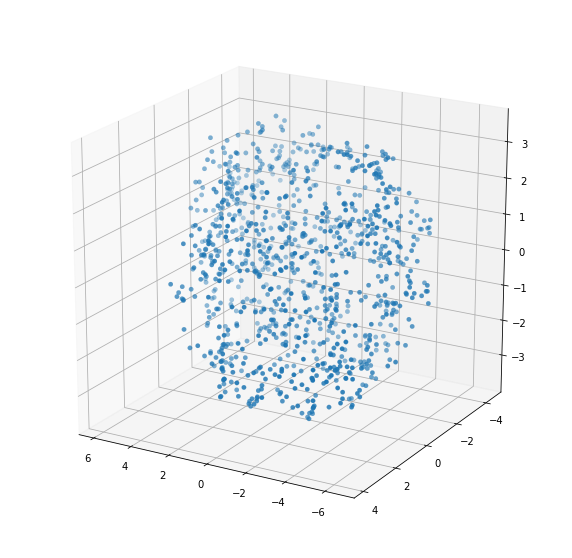

In [19]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


fig = plt.figure(figsize=(10, 10))



ax = fig.gca(projection='3d')
ax.scatter(X_embedded[:,0],X_embedded[:,1],X_embedded[:,2], linewidth=0.2)
#plt.title('3D t-SNE of '+str(param_count)+'-dimensional transformed noise')
ax.view_init(elev=20., azim=120)
plt.savefig('tSNE.pdf')
plt.show()





In [27]:
GeNVI_theta=torch.cat([GeN.sample(500)[0],GeN.sample(500)[1]],dim=0)#GeN(1110).detach()

In [7]:
PTMCMC_theta=torch.load('mlruns/4/99e4ed7c648f4cee971eb1924dfc52db/artifacts/theta.pt')
#'mlruns/4/0eb6f8d414d1424784fa76fed8506198/artifacts/theta.pt')
#'mlruns/4/814abccf119b4eb1a0f68c1f67dc773f/artifacts/theta.pt')
#'mlruns/4/74654e3a649f4f47a71234edee2e4424/artifacts/theta.pt')[0:-1:1]


In [8]:
PTMCMC_theta.shape

torch.Size([1111, 151])

In [9]:
from sklearn.manifold import TSNE
myTSNE=TSNE(n_components=3,init='pca',perplexity=20)
X_embedded =myTSNE.fit_transform(PTMCMC_theta.cpu())
print(myTSNE.kl_divergence_)
X_embedded.shape

0.06669864803552628


(1111, 3)

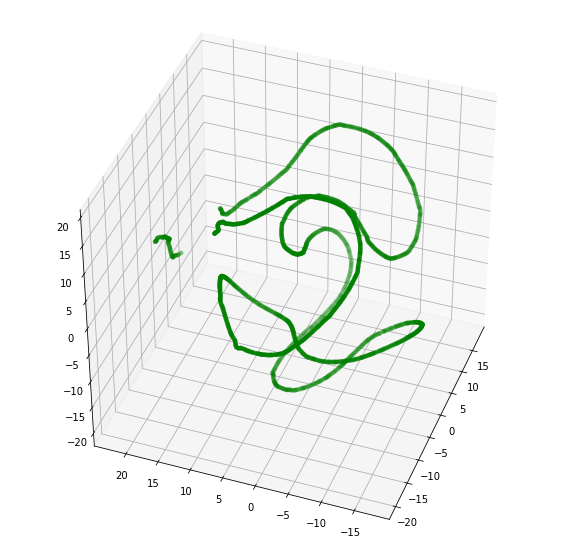

In [11]:
%matplotlib inline


from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.scatter(X_embedded[:,0],X_embedded[:,1],X_embedded[:,2], linewidth=0.2, color='green')
#plt.title('3D t-SNE of '+str(param_count)+'-dimensional transformed noise')

ax.view_init(elev=40., azim=200)
plt.savefig('PTMCMC_tSNE.pdf')
plt.show()


In [32]:
def KL(theta0,theta1,k=1):
        """
        Parameters:
            theta0 (Tensor): Samples, P X NbDimensions   
            theta1 (Tensor): Samples, R X NbDimensions   
            k (Int): positive ordinal number 

        Returns:
            (Float) k-Nearest Neighbour Estimation of the KL from theta0 to theta1  

        Kullback-Leibler Divergence Estimation of Continuous Distributions Fernando Pérez-Cruz
        """
        
        n0=theta0.shape[0]
        n1=theta1.shape[0]
        dim0=theta0.shape[1]
        dim1=theta1.shape[1]
        assert dim0 == dim1
        
   
        
        D0=torch.cdist(theta0,theta0)
        D1=torch.cdist(theta0,theta1)
        

        a0 = torch.topk(D0, k=k+1, dim=1, largest=False, sorted=True)[0][:,k]#.clamp(torch.finfo().eps,float('inf')).to(device)
        a1 = torch.topk(D1, k=k, dim=1, largest=False, sorted=True)[0][:,k-1]#.clamp(torch.finfo().eps,float('inf')).to(device)
        
        assert a0.shape == a1.shape
        
        d=torch.as_tensor(float(dim0),device=device)
        N0=torch.as_tensor(float(n0),device=device)
        N1=torch.as_tensor(float(n1),device=device)
        
        Mnn=(torch.log(a1)-torch.log(a0)).mean()
        return dim0*Mnn + N1.log()-(N0-1).log()

In [33]:
N=1000
K=torch.Tensor(N)
P_theta=PTMCMC_theta.to(device)
indices=list(range(P_theta.shape[0]))

for i in range(N):
    np.random.shuffle(indices)
    K[i]=KL(GeN(500).detach(),P_theta[indices[500:]], k=2)

print('KL: '+str(K.mean())+' ('+str(K.std())+')')

KL: tensor(419.2432) (tensor(8.0073))


In [34]:
N=1000
K=torch.Tensor(N)
P_theta=PTMCMC_theta.to(device)
indices=list(range(P_theta.shape[0]))

for i in range(N):
    np.random.shuffle(indices)
    K[i]=KL(P_theta[indices[500:]],GeN(500).detach(), k=2)

print('KL: '+str(K.mean())+' ('+str(K.std())+')')

KL: tensor(458.2726) (tensor(1.5487))


In [35]:
N=1000
K=torch.Tensor(N)
P_theta=PTMCMC_theta.to(device)
indices=list(range(P_theta.shape[0]))

for i in range(N):
    np.random.shuffle(indices)
    K[i]=KL(GeN(500).detach(),GeN(500).detach(), k=2)

print('KL: '+str(K.mean())+' ('+str(K.std())+')')

KL: tensor(-0.0374) (tensor(4.3876))


In [36]:
X=torch.arange(-2.,2.,0.03).to(device)

In [37]:
N=1000
K=torch.Tensor(N)
P_theta_pred=model(X,PTMCMC_theta.to(device)).squeeze()
indices=list(range(P_theta.shape[0]))

for i in range(N):
    np.random.shuffle(indices)
    GeNVI_pred=model(X,GeN(500).detach()).squeeze()
    K[i]=KL(GeNVI_pred,P_theta_pred[indices[500:]], k=2)

print('KL: '+str(K.mean())+' ('+str(K.std())+')')

KL: tensor(139.0296) (tensor(4.4577))


In [38]:
N=1000
K=torch.Tensor(N)
P_theta_pred=model(X,PTMCMC_theta.to(device)).squeeze()
indices=list(range(P_theta.shape[0]))

for i in range(N):
    np.random.shuffle(indices)
    GeNVI_pred=model(X,GeN(500).detach()).squeeze()
    K[i]=KL(P_theta_pred[indices[500:]],GeNVI_pred, k=2)

print('KL: '+str(K.mean())+' ('+str(K.std())+')')

KL: tensor(126.6886) (tensor(4.3025))


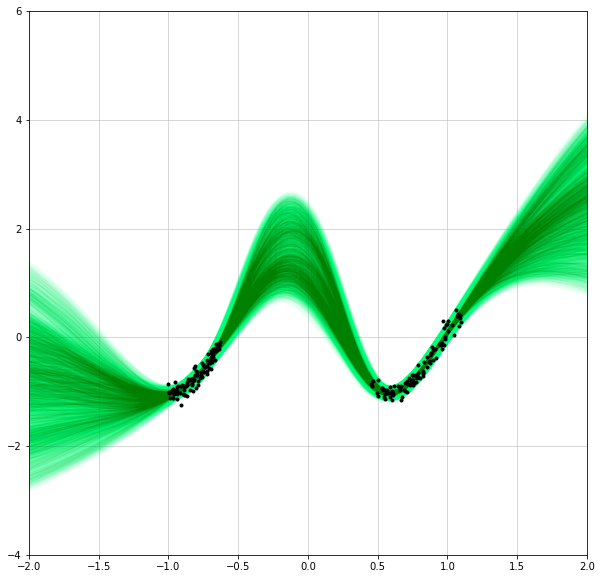

In [80]:
x=setup.makePlot(PTMCMC_theta,device)
x.savefig('PTMCMC_green_pred.png')


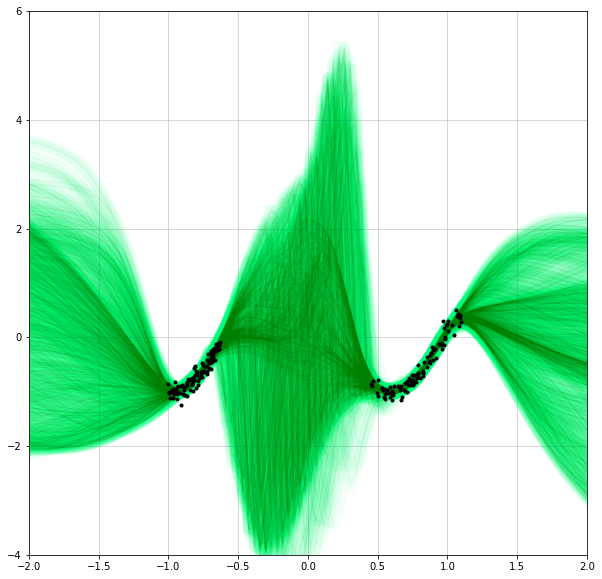

In [33]:
fig=setup.makePlot(GeNVI_theta,device)
fig.savefig('GeNVI_green_pred.svg')

In [39]:
N=PTMCMC_theta.shape[0]
GeNVI_pred=model(X,GeN(N).detach()).squeeze()
PTMCMC_pred=model(X,PTMCMC_theta.to(device)).squeeze()
theta_pred=torch.cat([GeNVI_pred, PTMCMC_pred])
c=torch.cat([torch.zeros(N), torch.ones(N)])
theta_pred.shape

torch.Size([2222, 134])

In [35]:
from sklearn.manifold import TSNE
myTSNE=TSNE(n_components=3,init='pca',perplexity=35)
X_embedded_pred =myTSNE.fit_transform(theta_pred.cpu())
print(myTSNE.kl_divergence_)
X_embedded.shape

0.5591526627540588


(1111, 3)

NameError: name 'X_embedded_pred' is not defined

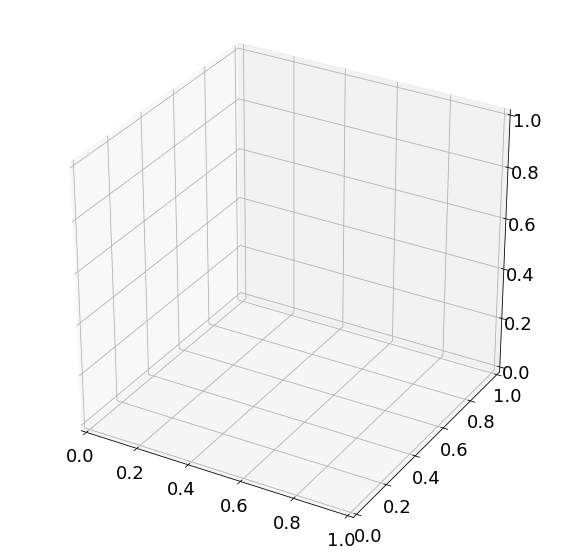

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches

plt.rcParams.update({'font.size': 18})


fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.scatter(X_embedded_pred[:,0],X_embedded_pred[:,1],X_embedded_pred[:,2],c=c, linewidth=0.2, cmap=cmap)
plt.title('Predictive space')
ax.view_init(elev=20., azim=90)


GeNVI_patch = mpatches.Patch(color=cmap(0.), label='GeNVI')
PTMCMC_patch = mpatches.Patch(color=cmap(1.), label='PTMCMC')
plt.legend(handles=[GeNVI_patch,PTMCMC_patch])
plt.savefig('Predictive_tSNE.pdf')
plt.show()

In [46]:
theta=torch.cat([GeN.sample(500).detach()[0],GeN.sample(500).detach()[1], PTMCMC_theta.to(device)],)
c=torch.cat([torch.zeros(500), 0.5*torch.ones(500), torch.ones(1111)])


In [37]:
theta=torch.cat([GeN(N).detach(), PTMCMC_theta.to(device)])
theta.shape

torch.Size([2222, 151])

In [44]:
from sklearn.manifold import TSNE
myTSNE=TSNE(n_components=3,init='pca',perplexity=100)
X_embedded =myTSNE.fit_transform(theta.cpu())
print(myTSNE.kl_divergence_)
X_embedded.shape

0.09536398947238922


(2111, 3)

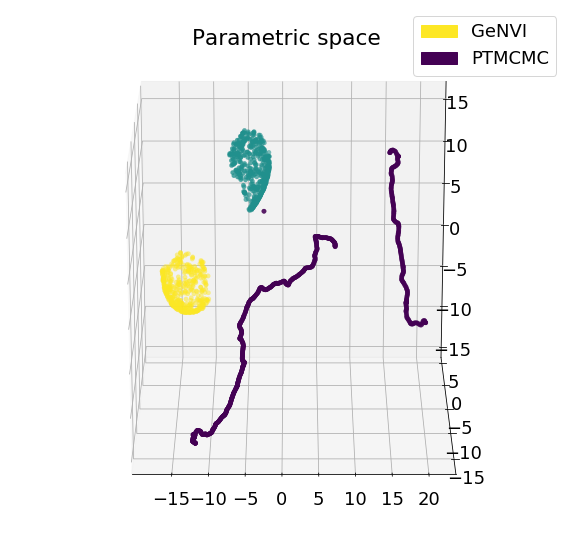

In [51]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches

plt.rcParams.update({'font.size': 18})


fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.scatter(X_embedded[:,0],X_embedded[:,1],X_embedded[:,2],c=c, linewidth=0.2, cmap=cmap)
plt.title('Parametric space')

ax.view_init(elev=20., azim=270)

GeNVI_patch = mpatches.Patch(color=cmap(0.), label='GeNVI')
PTMCMC_patch = mpatches.Patch(color=cmap(1.), label='PTMCMC')
plt.legend(handles=[GeNVI_patch,PTMCMC_patch])

plt.savefig('Parametric_tSNE.pdf')
plt.show()



Text(0.5, 1.0, '134 vs 73')

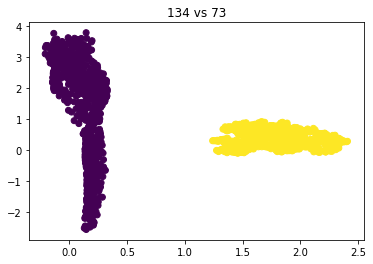

In [59]:
%matplotlib inline
i=np.random.randint(0,theta.shape[1])
j=np.random.randint(0,theta.shape[1])
X=theta[:,i].cpu()
Y=theta[:,j].cpu()
plt.scatter(X,Y, c=c)
plt.title(str(i)+' vs '+str(j))